# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Fatha Ariya Prasetya
- **Email:** fathaap@gmail.com
- **ID Dicoding:**

## Menentukan Pertanyaan Bisnis

- Question 1 : [Customer Segment Analysis] What is the level of customer satisfaction with the distribution of sellers?
- Question 2 : [Sales Efficiency Analysis] What has been the sales trend in the last few months?
- Question 3: [Sales Efficiency Analysis] What is the average revenue on product sales in each region? What is the most sold product in the top 3 regions?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [2]:
#Read all data from csv
customers_df = pd.read_csv('customers_dataset.csv')
geolocationdf = pd.read_csv('geolocation_dataset.csv')
itemorder_df = pd.read_csv('order_items_dataset.csv')
paymentorder_df = pd.read_csv('order_payments_dataset.csv')
reviewsorder_df = pd.read_csv('order_reviews_dataset.csv')
datasetorder_df = pd.read_csv('orders_dataset.csv')
categoryproduct_df = pd.read_csv('product_category_name_translation.csv')
datasetproduct_df = pd.read_csv('products_dataset.csv')
sellers_df = pd.read_csv('sellers_dataset.csv')

#### Question 1

In [3]:
itemreviews = pd.merge(
    left= reviewsorder_df,
    right=itemorder_df,
    how="inner",
    left_on= "order_id",
    right_on= "order_id"
)

itemreviews_seller = pd.merge(
    left=itemreviews,
    right=sellers_df,
    how="inner",
    left_on="seller_id",
    right_on="seller_id"
)

#### Question 2

In [4]:
#Joining table between orders_dataset and customers_id
order_and_customer = pd.merge(
    left= datasetorder_df,
    right= customers_df,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"

)


#### Question 3

In [5]:
#Joining table between orders_dataset and order_item
orderitem_full  = pd.merge(
    left= datasetorder_df,
    right= itemorder_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
#Joining table orderitem_full and product_dataset
order_product_last = pd.merge(
    left= orderitem_full,
    right= datasetproduct_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)
#Joining table order_product and custoers_dataset
order_product = pd.merge(
    left= order_product_last,
    right= customers_df,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)

### Assessing Data

#### Question 1

In [6]:
#Check if any NULL data
print(itemreviews_seller.info())
print("=========================")
print(itemreviews_seller.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112372 entries, 0 to 112371
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   review_id                112372 non-null  object 
 1   order_id                 112372 non-null  object 
 2   review_score             112372 non-null  int64  
 3   review_comment_title     13434 non-null   object 
 4   review_comment_message   47642 non-null   object 
 5   review_creation_date     112372 non-null  object 
 6   review_answer_timestamp  112372 non-null  object 
 7   order_item_id            112372 non-null  int64  
 8   product_id               112372 non-null  object 
 9   seller_id                112372 non-null  object 
 10  shipping_limit_date      112372 non-null  object 
 11  price                    112372 non-null  float64
 12  freight_value            112372 non-null  float64
 13  seller_zip_code_prefix   112372 non-null  int64  
 14  sell

Because we only need review_score as a determinant of the level of satisfaction, the NULL data on comment tittle and comment message is ignored

In [7]:
#check if any duplicated data
print(f"Duplicated data: {itemreviews_seller.duplicated().sum()}")

Duplicated data: 0


Because there is no duplicated data, then we can proceed to the next stage

#### Question 2

Check data type and data Null

In [8]:
#check data type
print(order_and_customer.isna().info())
print("===========================================================")
#check if any NULL data
print(order_and_customer.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   order_id                       99441 non-null  bool 
 1   customer_id                    99441 non-null  bool 
 2   order_status                   99441 non-null  bool 
 3   order_purchase_timestamp       99441 non-null  bool 
 4   order_approved_at              99441 non-null  bool 
 5   order_delivered_carrier_date   99441 non-null  bool 
 6   order_delivered_customer_date  99441 non-null  bool 
 7   order_estimated_delivery_date  99441 non-null  bool 
 8   customer_unique_id             99441 non-null  bool 
 9   customer_zip_code_prefix       99441 non-null  bool 
 10  customer_city                  99441 non-null  bool 
 11  customer_state                 99441 non-null  bool 
dtypes: bool(12)
memory usage: 1.1 MB
None
order_id                            

Check why data can be NULL

In [9]:
#check how data can be NULL
order_and_customer_check= pd.DataFrame(order_and_customer)

# show row with NULL value
null_rows = order_and_customer_check[order_and_customer_check.isnull().any(axis=1)]
print(null_rows)

                               order_id                       customer_id  \
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
44     ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
103    0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
128    15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
154    6942b8da583c2f9957e990d028607019  52006a9383bf149a4fb24226b173106f   
...                                 ...                               ...   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99313  e9e64a17afa9653aacf2616d94c005b8  b4cd0522e632e481f8eaf766a2646e86   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
99348  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
99415  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

      order_status order_purchase_timestamp    order_approved_at  \
6      

Because Null data are filled by "NaN", we can drop it. Because we want data that has been sent (has a date that has been delivered and has a delivered status)

After that, check if any duplicated data

In [10]:
print(f"Duplicated data: {order_and_customer.duplicated().sum()}")

Duplicated data: 0


There is no duplicated data

#### Question 3

In [11]:
#check data type
print(order_product.isna().info())
print("===========================================================")
#check if any NULL data
print(order_product.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   order_id                       112650 non-null  bool 
 1   customer_id                    112650 non-null  bool 
 2   order_status                   112650 non-null  bool 
 3   order_purchase_timestamp       112650 non-null  bool 
 4   order_approved_at              112650 non-null  bool 
 5   order_delivered_carrier_date   112650 non-null  bool 
 6   order_delivered_customer_date  112650 non-null  bool 
 7   order_estimated_delivery_date  112650 non-null  bool 
 8   order_item_id                  112650 non-null  bool 
 9   product_id                     112650 non-null  bool 
 10  seller_id                      112650 non-null  bool 
 11  shipping_limit_date            112650 non-null  bool 
 12  price                          112650 non-null  bool 
 13 

In [12]:
#check how data can be NULL
order_product_check= pd.DataFrame(order_product)

# show row with NULL value
null_rows = order_product[order_product.isnull().any(axis=1)]
print(null_rows)

                                order_id                       customer_id  \
98      3a53d5a9a0c58d291ff3ae407b6df5fd  5612aa60cdbbd8e9d89ae0c409080375   
103     72c501775cf36e99076132aaee5ae9c0  6cc8f025e1b94225a79f478d3bcba65c   
192     136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
193     9c9504bb506aa1635fb6ad19be9bcfa9  5638c42751e237d265ad0c0536256311   
265     ae86dbc1549b4c0cb00dc0ea909fc6d2  2748df3a97f1a8f54195312846fe7917   
...                                  ...                               ...   
112525  5a8a4dc28b16fb90469ad749f9535773  c0c8b8bb055100a0cc08dcc04d847ac9   
112529  b159d0ce7cd881052da94fa165617b05  e0c3bc5ce0836b975d6b2a8ce7bb0e3e   
112542  021dac6e3120485db6a77474aa21b979  c40f7f00e91eb8a0da1e58484380a796   
112596  aea0db338150b526dde24f6fd953a5ed  379a02efdc6a56bd27f99b95fc2f6c06   
112605  e33865519137f5737444109ae8438633  64b086bdcc54458af3ea3bd838db54a5   

       order_status order_purchase_timestamp    order_approved_

from the NULL data presented, we need price, order id, and product category name data. Because the product category name has a NULL value, we can just throw it away because it is impossible to get from the approximate value using interpolation techniques and etc.

Check Duplicate Data

In [13]:
print(f"Duplicated Data: {order_product_check.duplicated().sum()}")

Duplicated Data: 0


There is no duplicated data

### Cleaning Data

#### Question 1

Remove unnecessary columns

In [14]:
#Drop column which we won't use it
column_drop = ['review_comment_title','review_comment_message','review_answer_timestamp', 'order_item_id','shipping_limit_date','price','freight_value']
itemreviews_seller.drop(column_drop,axis=1,inplace=True)
itemreviews_seller.head(20)

,review_id,order_id,review_score,review_creation_date,product_id,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,14600,sao joaquim da barra,SP
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,14600,sao joaquim da barra,SP
2,5fdb2ed7aa0f1b1c9642175b302e38af,b0bc656fed47584c160f8cff2d7b8bbd,5,2018-03-17 00:00:00,1acb18fc869c5489d5f76abcd681165e,6d803cb79cc31c41c4c789a75933b3c7,14600,sao joaquim da barra,SP
3,5fdb2ed7aa0f1b1c9642175b302e38af,b0bc656fed47584c160f8cff2d7b8bbd,5,2018-03-17 00:00:00,1acb18fc869c5489d5f76abcd681165e,6d803cb79cc31c41c4c789a75933b3c7,14600,sao joaquim da barra,SP
4,a085ad47c649d76e19a93be48169ef41,52b39f7d5f670b983cae0ae2607bb1bc,5,2017-08-02 00:00:00,45faac1ea8c173bb8c3e6cf23f5aac4e,6d803cb79cc31c41c4c789a75933b3c7,14600,sao joaquim da barra,SP
5,282c587306444ba24614b51e3cf9e224,f0cd188382c01c2acf331a637d869acc,5,2018-04-19 00:00:00,1acb18fc869c5489d5f76abcd681165e,6d803cb79cc31c41c4c789a75933b3c7,14600,sao joaquim da barra,SP
6,282c587306444ba24614b51e3cf9e224,f0cd188382c01c2acf331a637d869acc,5,2018-04-19 00:00:00,1acb18fc869c5489d5f76abcd681165e,6d803cb79cc31c41c4c789a75933b3c7,14600,sao joaquim da barra,SP
7,63f52661d616df41166b2c916db628f6,61edec4c7086a5383dc4f5e6fca69e9b,3,2018-06-12 00:00:00,cbd2c1ba72b7f4ce36a69fd430c019ae,6d803cb79cc31c41c4c789a75933b3c7,14600,sao joaquim da barra,SP
8,63f52661d616df41166b2c916db628f6,61edec4c7086a5383dc4f5e6fca69e9b,3,2018-06-12 00:00:00,cbd2c1ba72b7f4ce36a69fd430c019ae,6d803cb79cc31c41c4c789a75933b3c7,14600,sao joaquim da barra,SP
9,594c13e9e908f812ee3b049cf7e7386d,a60d308a1328a95a1e34b0c19e1ead05,5,2018-04-21 00:00:00,57dcf5497a141d23764008088c8d9974,6d803cb79cc31c41c4c789a75933b3c7,14600,sao joaquim da barra,SP


#### Question 2

Drop Null value. After that, check again

In [15]:
#drop NULL value
order_and_customer.dropna(axis=0,inplace=True)
#check NULL value
order_and_customer.isna().sum()
#There are no NULL value

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

Drop column which we won't use it. It will make easier to analyze

In [16]:
#Drop Column which we won't use it
column_to_drop = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','customer_unique_id']
order_and_customer.drop(column_to_drop,axis=1,inplace=True)
order_and_customer.head(20)

,order_id,customer_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,2017-10-18 00:00:00,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45,2018-08-13 00:00:00,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-17 18:06:29,2018-09-04 00:00:00,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-12-02 00:28:42,2017-12-15 00:00:00,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-16 18:17:02,2018-02-26 00:00:00,9195,santo andre,SP
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-26 10:57:55,2017-08-01 00:00:00,86320,congonhinhas,PR
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-26 12:55:51,2017-06-07 00:00:00,26525,nilopolis,RJ
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-02-02 14:08:10,2017-03-06 00:00:00,99655,faxinalzinho,RS
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-08-16 17:14:30,2017-08-23 00:00:00,18075,sorocaba,SP
10,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-29 11:18:31,2017-06-07 00:00:00,20780,rio de janeiro,RJ


#### Question 3

In [17]:
#drop NULL value
order_product.dropna(axis=0,subset=['product_category_name','order_delivered_customer_date'],inplace=True)
#check NULL value
order_product.isna().sum()
#There are no NULL value

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
order_item_id                     0
product_id                        0
seller_id                         0
shipping_limit_date               0
price                             0
freight_value                     0
product_category_name             0
product_name_lenght               0
product_description_lenght        0
product_photos_qty                0
product_weight_g                  1
product_length_cm                 1
product_height_cm                 1
product_width_cm                  1
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
dtype: int64

Drop column which we won't use

In [18]:
#Drop Column which we won't use it
column_to_drop = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_estimated_delivery_date','seller_id','shipping_limit_date','freight_value','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','customer_unique_id','customer_zip_code_prefix']
order_product.drop(column_to_drop,axis=1,inplace=True)
order_product.head(20)

,order_id,customer_id,order_status,order_delivered_customer_date,order_item_id,product_id,price,product_category_name,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,sao paulo,SP
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-18 14:44:43,1,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,sao paulo,SP
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-07 18:30:01,1,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,sao paulo,SP
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-11-07 18:04:59,1,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,florianopolis,SC
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45,1,595fac2a385ac33a80bd5114aec74eb8,118.70,perfumaria,barreiras,BA
5,40c5e18f7d112b59b3e5113a59a905b3,67407057a7d5ee17d1cd09523f484d13,delivered,2018-06-19 00:31:13,1,595fac2a385ac33a80bd5114aec74eb8,119.90,perfumaria,rio de janeiro,RJ
6,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-14 18:51:47,1,595fac2a385ac33a80bd5114aec74eb8,116.90,perfumaria,ituverava,SP
7,f913d229653fdd809c249ed98ab6b754,e1365d7b227b247b6bc0931771885eaf,delivered,2018-05-08 17:53:51,1,595fac2a385ac33a80bd5114aec74eb8,119.90,perfumaria,porto alegre,RS
8,9b85bbefeeacfebc3ff603d20511734f,7f4f07b97783e894fccff9d72e0988b3,delivered,2017-12-07 19:48:32,1,595fac2a385ac33a80bd5114aec74eb8,109.90,perfumaria,florianopolis,SC
9,6164d50a564536f9c8081d0358573bad,ff83b1b9ffb0f2f60273867bb26f671e,delivered,2018-08-14 20:04:39,1,595fac2a385ac33a80bd5114aec74eb8,116.90,perfumaria,itauna,MG


## Exploratory Data Analysis (EDA)

### Explore ...

#### Question 1

Eksplorasi Review score

In [19]:
itemreviews_seller["review_score"].describe()

count    112372.000000
mean          4.032473
std           1.387849
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

Eksplorasi review score terendah pada setiap wilayah

In [20]:
state_mean_score = itemreviews_seller.groupby('seller_state')['review_score'].mean()
state_mean_score_sorted = state_mean_score.sort_values(ascending=False)
state_mean_score_sorted_df = pd.DataFrame(state_mean_score_sorted)
print(state_mean_score_sorted_df)

              review_score
seller_state              
PA                4.500000
MS                4.469388
RN                4.267857
GO                4.254826
RS                4.214351
MT                4.165517
CE                4.138298
PE                4.132584
MG                4.105868
RJ                4.101670
SC                4.093865
BA                4.090202
PI                4.083333
PR                4.072292
DF                4.033333
ES                4.005450
SP                4.005078
MA                4.002506
SE                3.900000
PB                3.864865
RO                3.857143
AM                2.333333
AC                1.000000


Eksplorasi seller dengan review score terendah hinga tertinggi

In [21]:
seller_mean_score = itemreviews_seller.groupby(['seller_id','seller_state'])['review_score'].mean()
seller_mean_score_sorted = seller_mean_score.sort_values(ascending=True)
seller_mean_score_sorted

seller_id                         seller_state
6d04126aba80df143fd038e711b8fd96  RJ              1.0
b6c6854d4d92a5f6f46be8869da3fa1a  SP              1.0
34aefe746cd81b7f3b23253ea28bef39  PR              1.0
b7ba853e9551f4558440881fd3e5c815  RS              1.0
17adeba047385fb0c67d8e90b4296d21  SP              1.0
                                                 ... 
d7827b2af99326a03b0ed9c7a24db0d3  SP              5.0
4aba6a02a788d3ec81c03137144d9a80  SC              5.0
94ca168e8bcb407ab85c5da308863027  SP              5.0
95cca791657aabeff15a07eb152d7841  PR              5.0
186cdd1b2df32caa72cfb410bba768d3  SC              5.0
Name: review_score, Length: 3090, dtype: float64

Kategorikan seller dengan rating < 3 degan wilayahnya


In [22]:
bad_seller = seller_mean_score_sorted[seller_mean_score_sorted < 3]
bad_seller_grouped = bad_seller.groupby(level=1).count()
bad_seller_grouped_sort = bad_seller_grouped.sort_values(ascending=False)
bad_seller_grouped_sort_df = pd.DataFrame(bad_seller_grouped_sort)
print(bad_seller_grouped_sort_df)

              review_score
seller_state              
SP                     205
PR                      39
MG                      25
SC                      22
RS                      18
RJ                      16
CE                       4
DF                       4
BA                       2
GO                       2
AC                       1
AM                       1
ES                       1
PE                       1
RN                       1


#### Question 2

Total penjualan pada setiap wilayah

In [23]:
delivered_orders = order_and_customer[order_and_customer['order_status']=='delivered']
delivered_byregion = delivered_orders.groupby('customer_state')['order_id'].count()
delivered_byregion_sorted = delivered_byregion.sort_values(ascending=False)
print(delivered_byregion_sorted)

customer_state
SP    40488
RJ    12348
MG    11351
RS     5342
PR     4923
SC     3546
BA     3256
DF     2080
ES     1995
GO     1957
PE     1593
CE     1278
PA      946
MT      886
MA      716
MS      701
PB      517
PI      476
RN      474
AL      397
SE      335
TO      274
RO      243
AM      145
AC       80
AP       67
RR       41
Name: order_id, dtype: int64


Total Penjualan berdasarkan waktu (Bulan) menggunakan order_id

In [24]:
order_and_customer['order_delivered_customer_date'] = pd.to_datetime(order_and_customer['order_delivered_customer_date'])
total_bymonth = order_and_customer.groupby(order_and_customer['order_delivered_customer_date'].dt.to_period('M'))['order_id'].count()
total_bymonth_df = pd.DataFrame(total_bymonth)
total_bymonth_df.rename(columns={ "order_id":"Total Order"}, inplace = True)
print(total_bymonth_df)
total_bymonth_df.index = total_bymonth_df.index.strftime('%Y-%B')

                               Total Order
order_delivered_customer_date             
2016-10                                208
2016-11                                 60
2016-12                                  4
2017-01                                282
2017-02                               1350
2017-03                               2370
2017-04                               1849
2017-05                               3751
2017-06                               3223
2017-07                               3455
2017-08                               4302
2017-09                               3965
2017-10                               4494
2017-11                               4669
2017-12                               7205
2018-01                               6597
2018-02                               5850
2018-03                               6825
2018-04                               7850
2018-05                               7111
2018-06                               6829
2018-07    

Total Penjualan Berdasarkan Tahun

In [25]:
total_byyear = order_and_customer.groupby(order_and_customer['order_delivered_customer_date'].dt.to_period('Y'))['order_id'].count()
total_byyear_df = pd.DataFrame(total_byyear)
total_byyear_df.rename(columns={ "order_id":"Total Order"}, inplace = True)
print(total_byyear_df)
total_byyear_df.index = total_byyear_df.index.strftime('%Y')

                               Total Order
order_delivered_customer_date             
2016                                   272
2017                                 40915
2018                                 55274


#### Question 3

Average expenditure of each region

In [26]:
state_mean_price = order_product.groupby('customer_state')['price'].mean()
state_mean_price_sorted = state_mean_price.sort_values(ascending=False)
state_mean_price_sorted_df = pd.DataFrame(state_mean_price_sorted)
print(state_mean_price_sorted_df)

                     price
customer_state            
PB              190.369653
AL              185.060851
AC              178.247978
RO              168.925468
AP              165.121111
PI              163.075252
PA              160.155917
RN              158.305087
TO              156.763137
RR              154.806591
CE              153.718929
SE              151.207614
MT              147.462654
MA              146.157332
PE              143.790981
MS              143.134676
BA              134.526949
AM              134.248696
DF              126.525867
RJ              124.680375
SC              123.864653
GO              123.283861
ES              120.991926
MG              120.468369
RS              119.361295
PR              118.044559
SP              109.207789


Products with the highest purchases in the 3 regions with the highest purchases

In [27]:
state = ['PB', 'AL', 'AC']
new_order_product = order_product[order_product['customer_state'].isin(state)]

new_order_product_df = pd.DataFrame(new_order_product)
state_top_categories = new_order_product.groupby('customer_state')['product_category_name'].value_counts().reset_index(name='count')
state_top3_categories = state_top_categories.groupby('customer_state').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

print(state_top3_categories)

  customer_state   product_category_name  count
0             AC        moveis_decoracao     12
1             AC           esporte_lazer      9
2             AC  informatica_acessorios      8
3             AL            beleza_saude     62
4             AL  informatica_acessorios     39
5             AL      relogios_presentes     35
6             PB            beleza_saude     76
7             PB  informatica_acessorios     53
8             PB        moveis_decoracao     42


## Visualization & Explanatory Analysis

### Question 1: [Customer Segment Analysis] What is the level of customer satisfaction with the distribution of sellers?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9288\465603243.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="seller_state",y="review_score", data = state_mean_score_sorted_df, palette = colors, ax=ax[0] )
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9288\465603243.py:3: UserWarning: 
The palette list has fewer values (3) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="seller_state",y="review_score", data = state_mean_score_sorted_df, palette = colors, ax=ax[0] )
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9288\465603243.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="seller_state",y="review_score", data = bad_seller_grouped_sort_df, pale

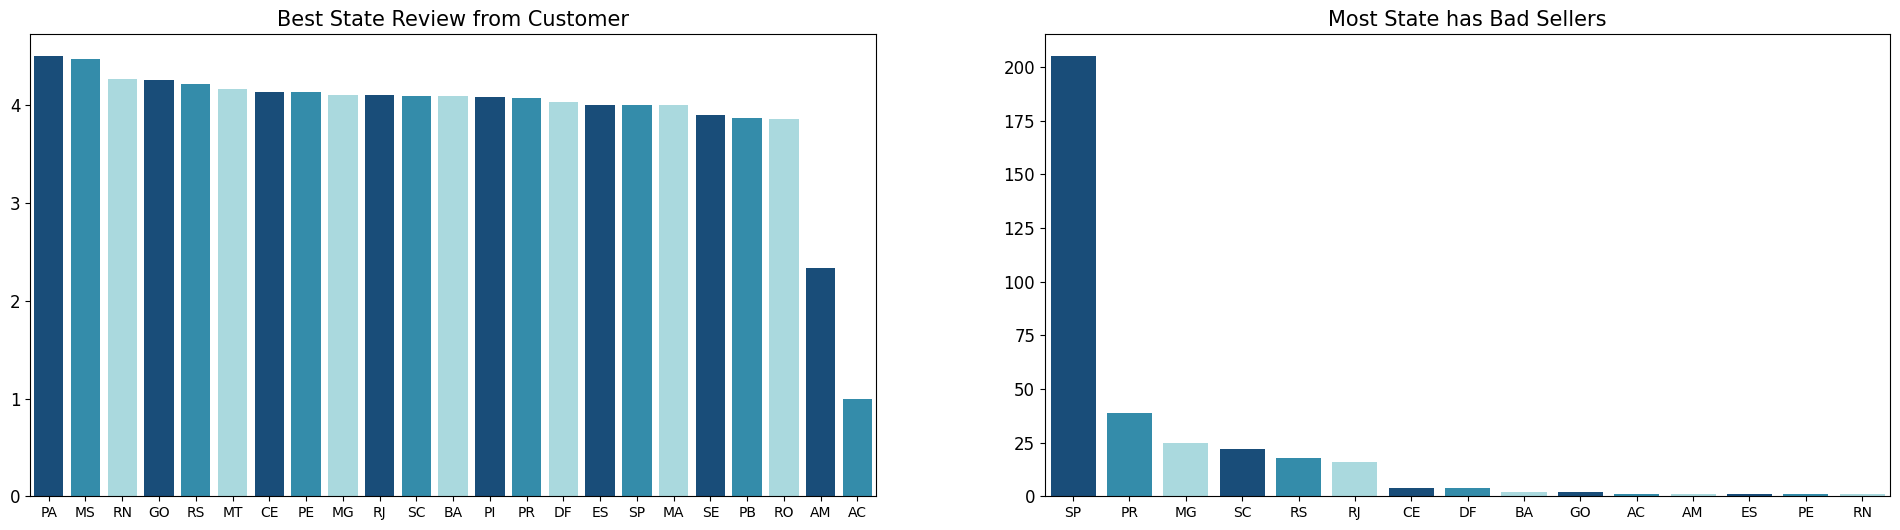

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#094e89","#2096be","#a1e0e7"]
sns.barplot(x="seller_state",y="review_score", data = state_mean_score_sorted_df, palette = colors, ax=ax[0] )
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best State Review from Customer", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="seller_state",y="review_score", data = bad_seller_grouped_sort_df, palette = colors, ax=ax[1] )
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Most State has Bad Sellers", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=12)

It can be seen on the left graph, there are several states with the highest to lowest customer ratings. On the far left, there is a state "PA" with the highest review score. This indicates that sellers in this region have a good reputation. Then, on the far right, there is the state "AC" with the lowest average review score. This indicates that sellers in this region have a bad reputation.



On the right graph, it can be seen that state "SP" has the highest total bad sellers. This indicates the need for action and attention to the sellers in this region.


### Question 2: [Sales Efficiency Analysis] What has been the sales trend in the last few months?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9288\1128494732.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(total_bymonth_df.index, rotation='vertical')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9288\1128494732.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(total_byyear_df.index, rotation='horizontal')


Text(0.5, 1.0, 'Total Orders per Year Chart')

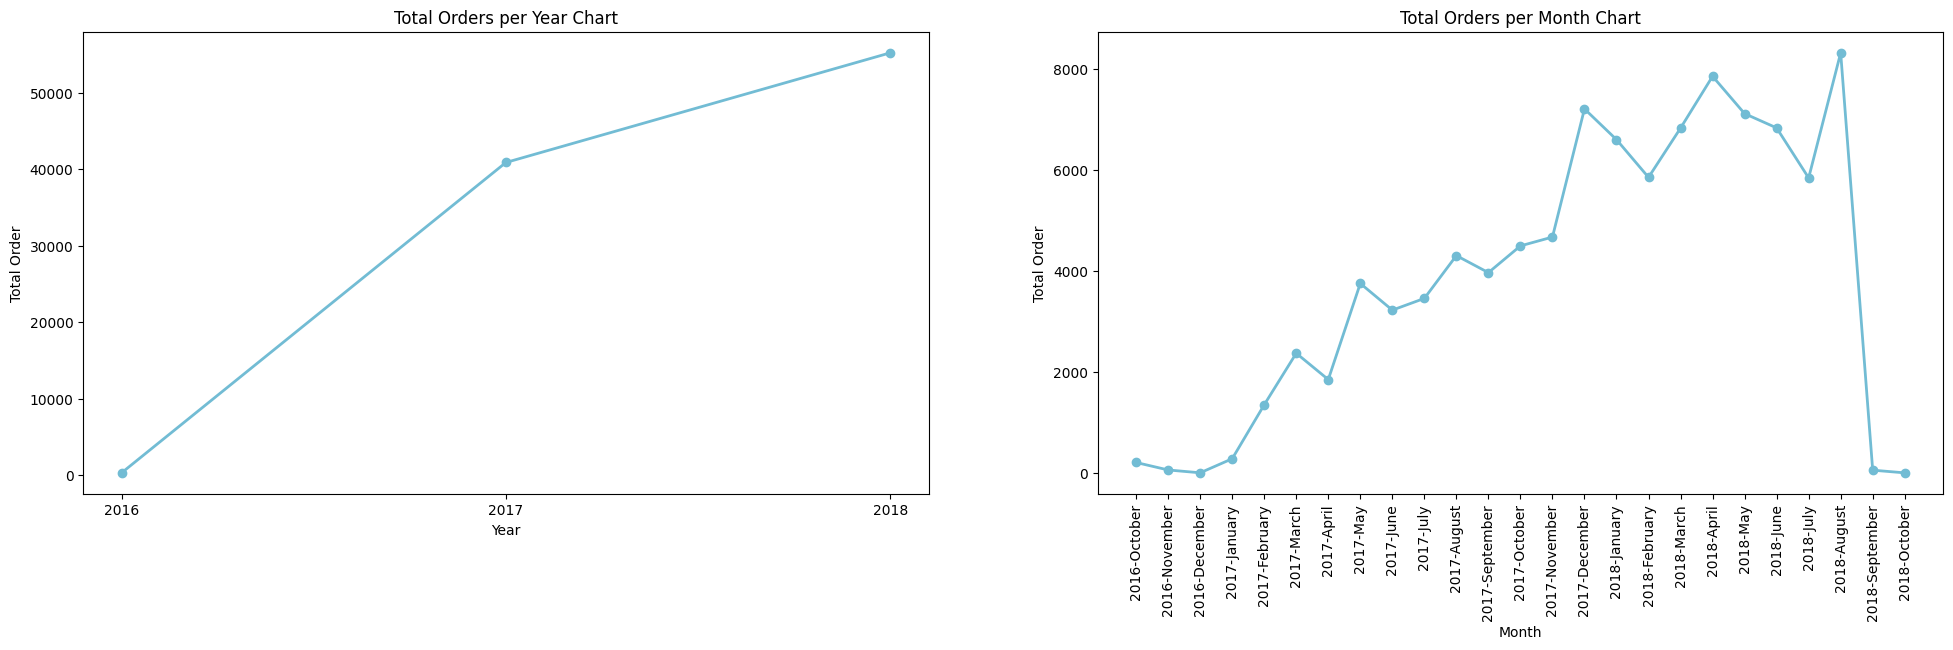

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
ax[1].plot(total_bymonth_df.index,total_bymonth_df["Total Order"], marker='o', linewidth=2, color="#72BCD4" )
ax[1].set_xticklabels(total_bymonth_df.index, rotation='vertical')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Total Order')
ax[1].set_title('Total Orders per Month Chart')

ax[0].plot(total_byyear_df.index,total_byyear_df["Total Order"], marker='o', linewidth=2, color="#72BCD4" )
ax[0].set_xticklabels(total_byyear_df.index, rotation='horizontal')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Total Order')
ax[0].set_title('Total Orders per Year Chart')

On the left graph, it is explained that there was an increase in sales from 2016 to 2018. If you look in more detail at the right graph, you can see the sales trend for each month. It can be obtained information that the highest sales were in August 2018 and the lowest sales were in October 2018. Sales in September 2018 had a very significant decrease from the previous month.

### Question 3: [Sales Efficiency Analysis] What is the average revenue on product sales in each region? What is the most sold product in the top 3 regions?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9288\504058828.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_state",y="price", data = state_mean_price_sorted_df, palette = colors, ax=ax )
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9288\504058828.py:3: UserWarning: 
The palette list has fewer values (3) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="customer_state",y="price", data = state_mean_price_sorted_df, palette = colors, ax=ax )


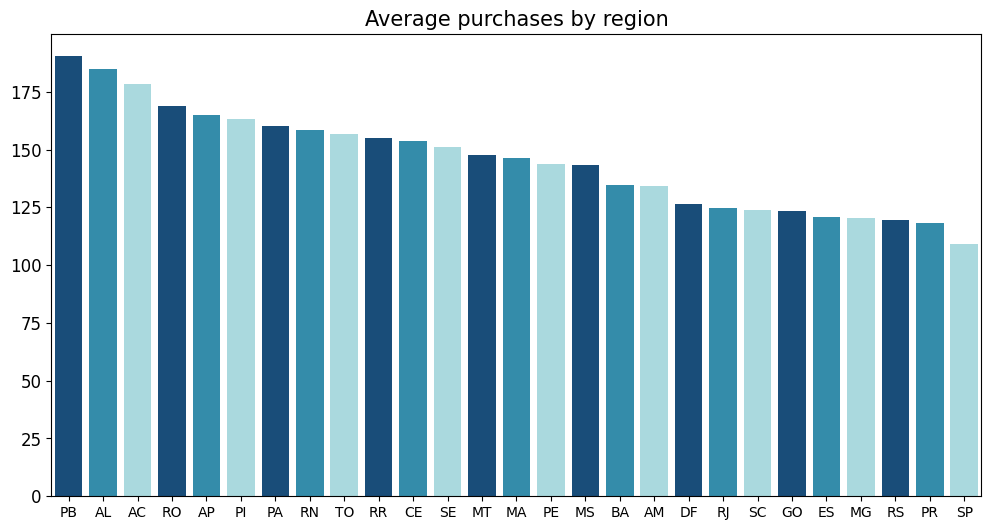

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
colors = ["#094e89","#2096be","#a1e0e7"]
sns.barplot(x="customer_state",y="price", data = state_mean_price_sorted_df, palette = colors, ax=ax )
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Average purchases by region", loc="center", fontsize=15)
ax.tick_params(axis ='y', labelsize=12)



It can be seen that state "PB" has the highest average purchase price, followed by state "AL" and "AC". In state "SP", the average money spent by each buyer is ranked the lowest.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9288\81372413.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data_st['product_category_name'], rotation=25, ha='right')  # Set horizontal rotation and placement
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9288\81372413.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data_st['product_category_name'], rotation=25, ha='right')  # Set horizontal rotation and placement
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9288\81372413.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data_st['product_category_name'], rotation=25, ha='right')  # Set horizontal rotation and placement


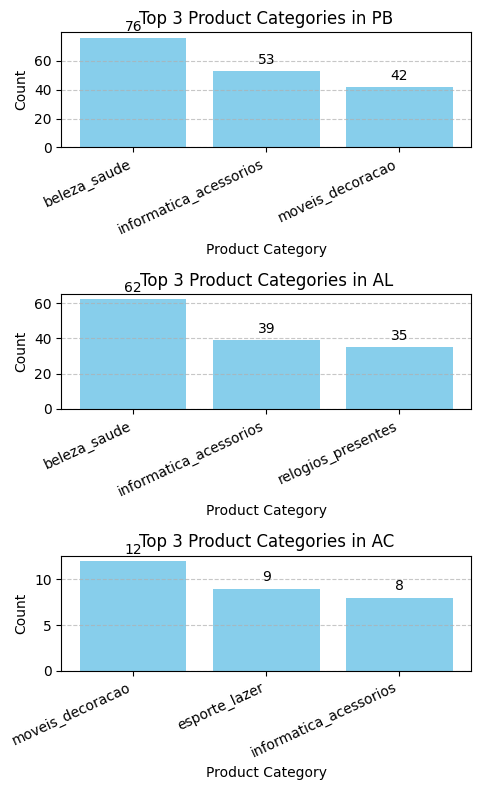

In [31]:
fig, axes = plt.subplots(nrows=len(state), ncols=1, figsize=(5, 8))

for i, st in enumerate(state):
    data_st = state_top3_categories[state_top3_categories['customer_state'] == st]
    ax = axes[i]
    bars = ax.bar(data_st['product_category_name'], data_st['count'], color='skyblue')
    ax.set_title('Top 3 Product Categories in ' + st)
    ax.set_ylabel('Count')
    ax.set_xlabel('Product Category')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Rotate x-axis labels
    ax.set_xticklabels(data_st['product_category_name'], rotation=25, ha='right')  # Set horizontal rotation and placement

    # Add a label above the bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

It can be seen that the most product purchases in state "PB" are beleza_saude, informatica_acessoris, and movies_decoracao. Then for state "AL" are beleza_saude, informatica_acessoris, and relogios_presentes. In addition, in state "AC" for the most product purchases are movies_decoracao, esporte_lazer, informatica_acessorios

## Conclusion

- Conclusion of Question 1

  - The state with the highest review score is the "PA" state. Then, the state with the lowest review score is state "AC". The number of sellers with the lowest review score is in state "SP". This can be a consideration for evaluating the state so that performance and customer ratings increase.

- Conclusion of Question 2
  - It can be concluded that the number of sales in the last three years has increased. However, in September and October there was a very significant decline from the previous few months. This information can be used as a reference to evaluate the company so that sales can rise as before.

- Conclusion of Question 3
  - It can be concluded that sales are highest in the 3 regions with the highest average shopping costs as follows:
    - In state "AL" are beleza_saude, informatica_acessories, and relogois_presentes.
    - In state "PB" are beleza_saude, informatica_acessories, and moveis_decoraco.
    - In state "AC" are moveis_decoracao, esporte_lazer, informatica_acessorios.
  - This information can be used as a reference for managing information on the availability of goods in the warehouse in order to balance between stock and high demand.